In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape
# checking the shape of data

(150, 5)

In [4]:
df.describe()
# describing the data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.199333
std,0.828066,0.433594,1.764420,0.763733
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       144 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()
# checking for missing values in the dataset

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         6
dtype: int64

In [7]:
# species have some missing values so replacing them with Iris-setosa
df['species'].fillna("Iris-setosa", inplace = True)
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:xlabel='sepal_width'>

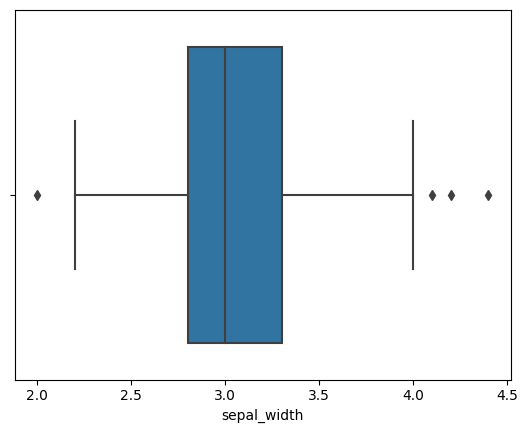

In [8]:
sns.boxplot(x = 'sepal_width', data = df)
# finding the outliers .. here the value above 4 and below 2 are acting as outliers

Old Shape:  (150, 5)
New Shape:  (146, 5)


C:\Users\ANURAG\AppData\Local\Temp\ipykernel_15228\2062330883.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['sepal_width'], 25,interpolation = 'midpoint')
C:\Users\ANURAG\AppData\Local\Temp\ipykernel_15228\2062330883.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['sepal_width'], 75,interpolation = 'midpoint')


<AxesSubplot:xlabel='sepal_width'>

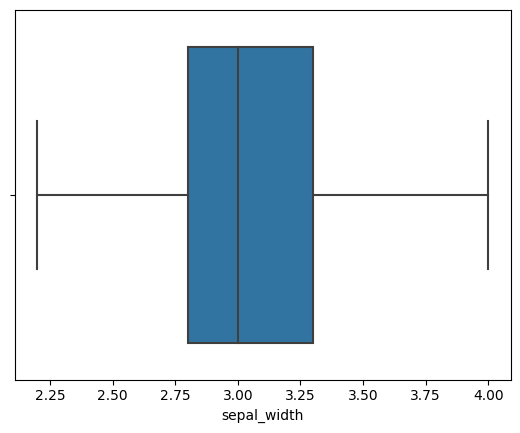

In [9]:
# removing the outliers
Q1 = np.percentile(df['sepal_width'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['sepal_width'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)
  
# Upper bound
upper = np.where(df['sepal_width'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(df['sepal_width'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)
  
sns.boxplot(x='sepal_width', data=df)

In [10]:
df['species'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: species, dtype: int64

In [11]:
mappings = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['species'] = df['species'].map(mappings)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
y=df[['species']].values


In [13]:
df.drop(['species'],axis=1)
X=df[['sepal_length','sepal_width','petal_length','petal_width']].values

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)

c:\users\anurag\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [15]:
model.score(X,y)

0.9726027397260274

In [16]:
y_pred = model.predict(X)
from sklearn import metrics
print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.98      0.94      0.96        49
           2       0.94      0.98      0.96        50

    accuracy                           0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



In [17]:
print(metrics.confusion_matrix(y,y_pred))


[[47  0  0]
 [ 0 46  3]
 [ 0  1 49]]
